In [243]:
##import libraries

#To handle data in the form of rows and columns
import pandas as pd

#import numerical libraries
import numpy as np 

#To import seaborn for statistical plots
import seaborn as sns

#To import plotting libraries
import matplotlib.pyplot as plt
from datetime import datetime
import  warnings

In [244]:
warnings.filterwarnings('ignore')

In [245]:
##Read the dataset
loan_data = pd.read_csv('loan.csv', low_memory=False)

In [246]:
loan_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [247]:
loan_data.shape

(39717, 111)

In [248]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [249]:
#Check the % of  missing values and Remove them

In [250]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [251]:
## Removing columns with Null values to Clean our dataset

In [252]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## Data Cleaning in progress

- We have removed columns with null values
- We started with 111 columns and now have come down to 57 columns.
- There is further scope to clean data as we have many single value columns present which would not provide any additional insight into our data, So let's drop them too like
- initial_list_status
- policy_code
- pub_rec

In [253]:
##Check the columns that do not have unique values in rows.
loan_data.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [254]:
##loan_data.drop(["pymnt_plan","delinq_amnt","tax_liens","acc_now_delinq","collections_12_mths_ex_med","pub_rec_bankruptcies","out_prncp_inv","initial_list_status","policy_code","pub_rec"],axis = 1, inplace = True)

In [255]:

## Identifying columns with unique value as 1 and then Dropping them
for column in loan_data.columns:
    if loan_data[column].nunique(dropna  = True) == 1:
        print(column)
        loan_data = loan_data.drop(column,axis=1)
print("--------")
loan_data

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens
--------


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN


In [256]:
loan_data.shape

(39717, 48)

- Now we are down to 47 columns.
- Let's also remove the columns that would not provide any insight to our Loan Default analysis in any way.
- Columns like ID, Member Id, Emp_Title are not helping us with any additional info that would prove to be useful.
  

In [257]:
loan_data.drop(['id','member_id','title','emp_title','zip_code','url','desc','last_credit_pull_d'], axis = 1, inplace = True)
loan_data.shape

(39717, 40)

## Post Loan Approval Attributes that can be Dropped

- We can skip the attributes that have details regarding Post Loan disbursal
- delinq_2yrs
- revol_bal
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- next_pymnt_d
- chargeoff_within_12_mths
- mths_since_last_delinq
- mths_since_last_record


In [258]:
loan_data.drop(["delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" ,  "funded_amnt_inv","mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [259]:
loan_data.shape
loan_data.head(5)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp_inv,total_pymnt_inv,pub_rec_bankruptcies
0,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,27.65,Jan-85,1,3,0,83.70%,9,0.00,5833.84,0.0
1,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,1.00,Apr-99,5,3,0,9.40%,4,0.00,1008.71,0.0
2,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,8.72,Nov-01,2,2,0,98.50%,10,0.00,3005.67,0.0
3,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,20.00,Feb-96,1,10,0,21%,37,0.00,12231.89,0.0
4,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,17.94,Jan-96,0,15,0,53.90%,38,524.06,3513.33,0.0


In [260]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [261]:
# Code for column-wise null percentages
round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)

loan_amnt               0.00
funded_amnt             0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_length              2.68
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
addr_state              0.00
dti                     0.00
earliest_cr_line        0.00
inq_last_6mths          0.00
open_acc                0.00
pub_rec                 0.00
revol_util              0.13
total_acc               0.00
out_prncp_inv           0.00
total_pymnt_inv         0.00
pub_rec_bankruptcies    1.81
dtype: float64

## Missing Value Treatment

In [262]:
## The two columns with missing values are emp_length and revol_util

In [263]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  object 
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_length            37544 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  addr_state            38577 non-null  object 
 15  dti                   38

In [264]:
loan_data.head(5)
loan_data.tail(5)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp_inv,total_pymnt_inv,pub_rec_bankruptcies
39712,2500,2500,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,...,11.33,Nov-90,0,13,0,13.10%,40,0.0,1213.88,NaN
39713,8500,8500,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,...,6.40,Dec-86,1,6,0,26.90%,9,0.0,1020.51,NaN
39714,5000,5000,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,...,2.30,Oct-98,0,11,0,19.40%,20,0.0,1397.12,NaN
39715,5000,5000,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,...,3.72,Nov-88,0,17,0,0.70%,26,0.0,672.66,NaN
39716,7500,7500,36 months,13.75%,255.43,E,E2,< 1 year,OWN,22000.0,...,14.29,Oct-03,0,7,0,51.50%,8,0.0,980.83,NaN


In [265]:
## Check the mode of the column with missing values
loan_data.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

In [266]:
## Check the value counts of the column to see the frequency of values.
loan_data.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [267]:
## we can safely assign the value of mode to the null values in the column and check if the assignment has happened
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isna().sum()


np.int64(0)

In [295]:
#Extracting integer from String in Employee Length (To be used in Correlation Analysis)
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x : ("".join(filter(str.isdigit, str(x)))))
#Extracting integer from String in Term (To be used in Correlation Analysis)
loan_data['term'] = loan_data['term'].apply(lambda x : ("".join(filter(str.isdigit, str(x)))))
loan_data.shape
##Creating another df for Correlation analysis 
loan_data2 = loan_data.copy()

## Bucketing

In [269]:
##Bucketing Values
def bucket_loan_amnt(column):
    if column < 5000:
        return '0-5k'
    elif (column > 5000) and (column <= 10000):
        return '5k-10k'
    elif (column > 10000) and (column <= 15000):
        return '10k-15k'
    else:
        return '15k above'

loan_data['Loan_amt_groups'] = loan_data.apply(lambda x: bucket_loan_amnt(x['loan_amnt']), axis = 1)
loan_data

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp_inv,total_pymnt_inv,pub_rec_bankruptcies,Loan_amt_groups
0,5000,5000,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,...,Jan-85,1,3,0,83.70%,9,0.0,5833.84,0.0,15k above
1,2500,2500,60 months,15.27%,59.83,C,C4,1,RENT,30000.0,...,Apr-99,5,3,0,9.40%,4,0.0,1008.71,0.0,0-5k
2,2400,2400,36 months,15.96%,84.33,C,C5,10,RENT,12252.0,...,Nov-01,2,2,0,98.50%,10,0.0,3005.67,0.0,0-5k
3,10000,10000,36 months,13.49%,339.31,C,C1,10,RENT,49200.0,...,Feb-96,1,10,0,21%,37,0.0,12231.89,0.0,5k-10k
5,5000,5000,36 months,7.90%,156.46,A,A4,3,RENT,36000.0,...,Nov-04,3,9,0,28.30%,12,0.0,5632.21,0.0,15k above
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,36 months,8.07%,78.42,A,A4,4,MORTGAGE,110000.0,...,Nov-90,0,13,0,13.10%,40,0.0,1213.88,NaN,0-5k
39713,8500,8500,36 months,10.28%,275.38,C,C1,3,RENT,18000.0,...,Dec-86,1,6,0,26.90%,9,0.0,1020.51,NaN,5k-10k
39714,5000,5000,36 months,8.07%,156.84,A,A4,1,MORTGAGE,100000.0,...,Oct-98,0,11,0,19.40%,20,0.0,1397.12,NaN,15k above
39715,5000,5000,36 months,7.43%,155.38,A,A2,1,MORTGAGE,200000.0,...,Nov-88,0,17,0,0.70%,26,0.0,672.66,NaN,15k above


In [270]:
#Bucketing Annual Income
def Annual_Inc_Bucket(column):
    if column < 40000:
        return  'Below 40k'
    elif (column > 40000) and (column <= 50000):
        return  '40k-50k'
    elif (column > 50000) and (column <= 60000):
        return  '50k-60k'
    elif (column > 60000) and (column <= 70000):
        return  '60k-70k'
    elif (column > 70000) and (column <= 80000):
        return  '70k-80k'
    elif (column > 80000) and (column <= 90000):
        return  '80k-90k'
    else :
        return  '90k above'

loan_data['Income_groups'] = loan_data.apply(lambda x: Annual_Inc_Bucket(x['annual_inc']), axis = 1)
loan_data

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp_inv,total_pymnt_inv,pub_rec_bankruptcies,Loan_amt_groups,Income_groups
0,5000,5000,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,...,1,3,0,83.70%,9,0.0,5833.84,0.0,15k above,Below 40k
1,2500,2500,60 months,15.27%,59.83,C,C4,1,RENT,30000.0,...,5,3,0,9.40%,4,0.0,1008.71,0.0,0-5k,Below 40k
2,2400,2400,36 months,15.96%,84.33,C,C5,10,RENT,12252.0,...,2,2,0,98.50%,10,0.0,3005.67,0.0,0-5k,Below 40k
3,10000,10000,36 months,13.49%,339.31,C,C1,10,RENT,49200.0,...,1,10,0,21%,37,0.0,12231.89,0.0,5k-10k,40k-50k
5,5000,5000,36 months,7.90%,156.46,A,A4,3,RENT,36000.0,...,3,9,0,28.30%,12,0.0,5632.21,0.0,15k above,Below 40k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,36 months,8.07%,78.42,A,A4,4,MORTGAGE,110000.0,...,0,13,0,13.10%,40,0.0,1213.88,NaN,0-5k,90k above
39713,8500,8500,36 months,10.28%,275.38,C,C1,3,RENT,18000.0,...,1,6,0,26.90%,9,0.0,1020.51,NaN,5k-10k,Below 40k
39714,5000,5000,36 months,8.07%,156.84,A,A4,1,MORTGAGE,100000.0,...,0,11,0,19.40%,20,0.0,1397.12,NaN,15k above,90k above
39715,5000,5000,36 months,7.43%,155.38,A,A2,1,MORTGAGE,200000.0,...,0,17,0,0.70%,26,0.0,672.66,NaN,15k above,90k above


## Creating bins for some numerical variables to convert them into categorical

In [271]:
#Create bins for Interest rate and dti
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
loan_data

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec,revol_util,total_acc,out_prncp_inv,total_pymnt_inv,pub_rec_bankruptcies,Loan_amt_groups,Income_groups,int_rate_groups,dti_groups
0,5000,5000,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,0,83.70%,9,0.0,5833.84,0.0,15k above,Below 40k,9%-13%,24-30
1,2500,2500,60 months,15.27,59.83,C,C4,1,RENT,30000.0,...,0,9.40%,4,0.0,1008.71,0.0,0-5k,Below 40k,13%-17%,0-6
2,2400,2400,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,0,98.50%,10,0.0,3005.67,0.0,0-5k,Below 40k,13%-17%,6-12
3,10000,10000,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,0,21%,37,0.0,12231.89,0.0,5k-10k,40k-50k,13%-17%,18-24
5,5000,5000,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,0,28.30%,12,0.0,5632.21,0.0,15k above,Below 40k,5%-9%,6-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,36 months,8.07,78.42,A,A4,4,MORTGAGE,110000.0,...,0,13.10%,40,0.0,1213.88,NaN,0-5k,90k above,5%-9%,6-12
39713,8500,8500,36 months,10.28,275.38,C,C1,3,RENT,18000.0,...,0,26.90%,9,0.0,1020.51,NaN,5k-10k,Below 40k,9%-13%,6-12
39714,5000,5000,36 months,8.07,156.84,A,A4,1,MORTGAGE,100000.0,...,0,19.40%,20,0.0,1397.12,NaN,15k above,90k above,5%-9%,0-6
39715,5000,5000,36 months,7.43,155.38,A,A2,1,MORTGAGE,200000.0,...,0,0.70%,26,0.0,672.66,NaN,15k above,90k above,5%-9%,0-6


In [272]:
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
loan_data

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_acc,out_prncp_inv,total_pymnt_inv,pub_rec_bankruptcies,Loan_amt_groups,Income_groups,int_rate_groups,dti_groups,installment_groups,loan_amnt_groups
0,5000,5000,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,9,0.0,5833.84,0.0,15k above,Below 40k,9%-13%,24-30,145-274,0-5k
1,2500,2500,60 months,15.27,59.83,C,C4,1,RENT,30000.0,...,4,0.0,1008.71,0.0,0-5k,Below 40k,13%-17%,0-6,14-145,0-5k
2,2400,2400,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,10,0.0,3005.67,0.0,0-5k,Below 40k,13%-17%,6-12,14-145,0-5k
3,10000,10000,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,37,0.0,12231.89,0.0,5k-10k,40k-50k,13%-17%,18-24,274-403,5k-10k
5,5000,5000,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,12,0.0,5632.21,0.0,15k above,Below 40k,5%-9%,6-12,145-274,0-5k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,36 months,8.07,78.42,A,A4,4,MORTGAGE,110000.0,...,40,0.0,1213.88,NaN,0-5k,90k above,5%-9%,6-12,14-145,0-5k
39713,8500,8500,36 months,10.28,275.38,C,C1,3,RENT,18000.0,...,9,0.0,1020.51,NaN,5k-10k,Below 40k,9%-13%,6-12,274-403,5k-10k
39714,5000,5000,36 months,8.07,156.84,A,A4,1,MORTGAGE,100000.0,...,20,0.0,1397.12,NaN,15k above,90k above,5%-9%,0-6,145-274,0-5k
39715,5000,5000,36 months,7.43,155.38,A,A2,1,MORTGAGE,200000.0,...,26,0.0,672.66,NaN,15k above,90k above,5%-9%,0-6,145-274,0-5k


## Outlier Treatment

- Let's first look at numerical columns an

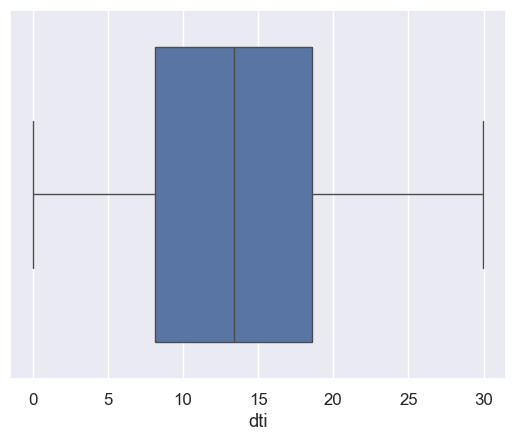

In [273]:
##Checking the numerical columns to see the presence of outliers
sns.boxplot(x=loan_data["dti"])
plt.show()

- The distribution looks good, So no need to remove any outlier

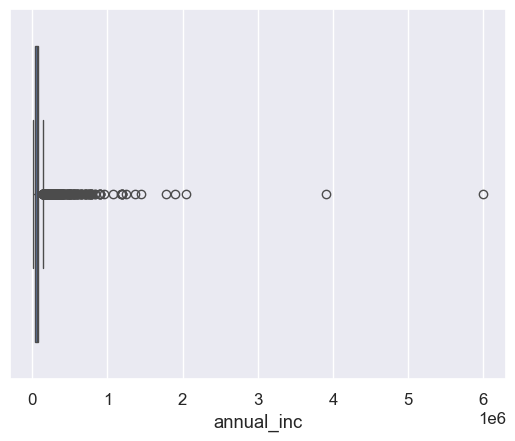

In [274]:
sns.boxplot(x=loan_data["annual_inc"])
plt.show()

In [275]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [276]:
#Defining 95th quantile and then only keeping values less than that
quant_95 = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= quant_95]

<Axes: ylabel='annual_inc'>

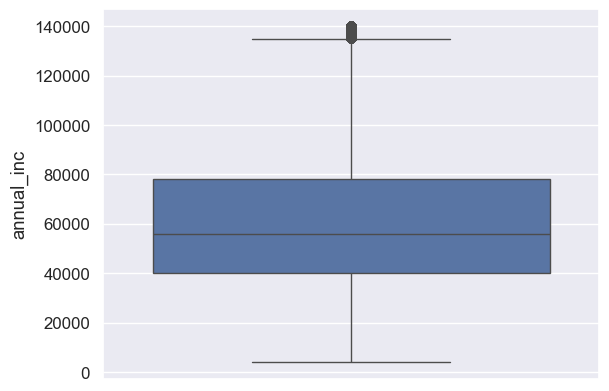

In [277]:
##Check if the Outliers have been removed
sns.boxplot(loan_data.annual_inc)

<Axes: ylabel='loan_amnt'>

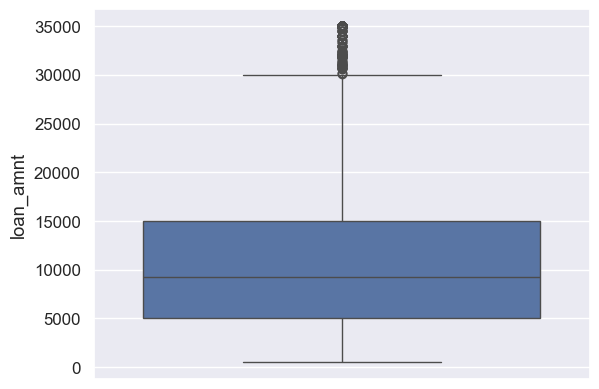

In [278]:
## Check for outliers in other numerical columns
sns.boxplot(loan_data.loan_amnt)

## Univariate Analysis 

1. Categorical variables
1. Ordered categorical data
    1. Grade (grade)
    2. Sub grade (sub_grade)
    3. Term (36 / 60 months) (term)
    4. Employment length (emp_length)
    5. Issue year (issue_y)
    6. Issue month (issue_m)
    7. Issue quarter (issue_q)


2. Unordered categorical data
    1. Address State (addr_state)
    2. Loan purpose (purpose)
    3. Home Ownership (home_ownership)
    4. Loan status (loan_status)
    5. Loan paid (loan_paid)


<Axes: xlabel='loan_status', ylabel='count'>

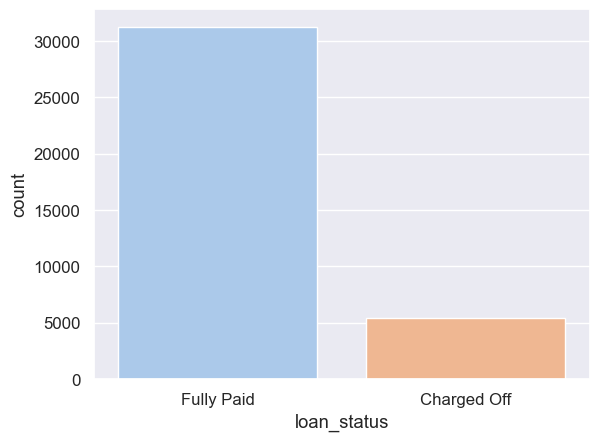

In [279]:
sns.countplot(x = 'loan_status', data = loan_data, palette="pastel")

Countplot of home_ownership


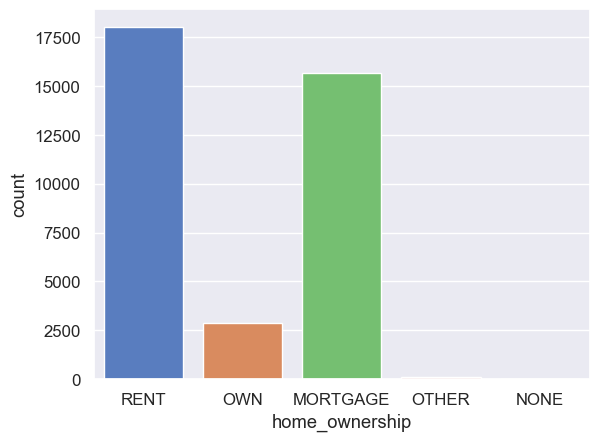

Countplot of verification_status


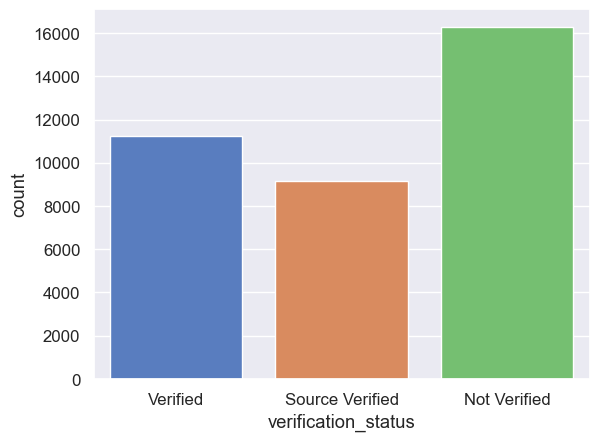

Countplot of grade


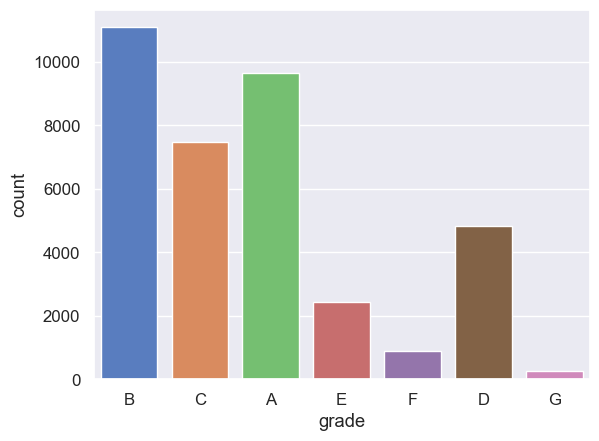

Countplot of int_rate_groups


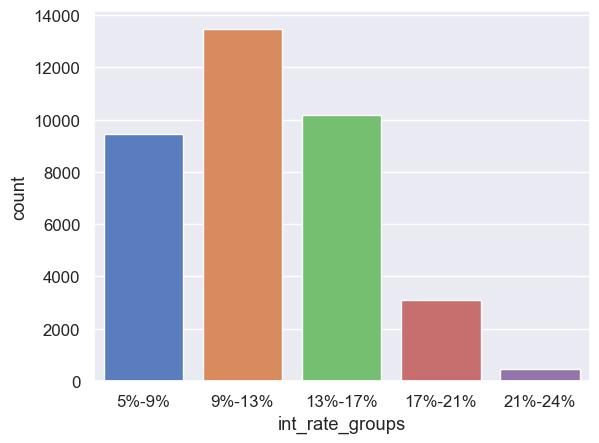

Countplot of dti_groups


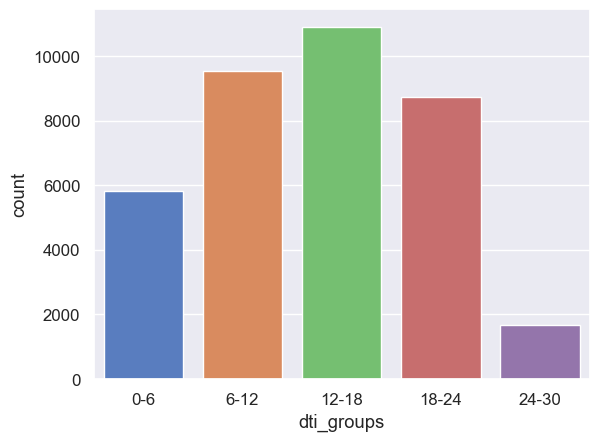

Countplot of Income_groups


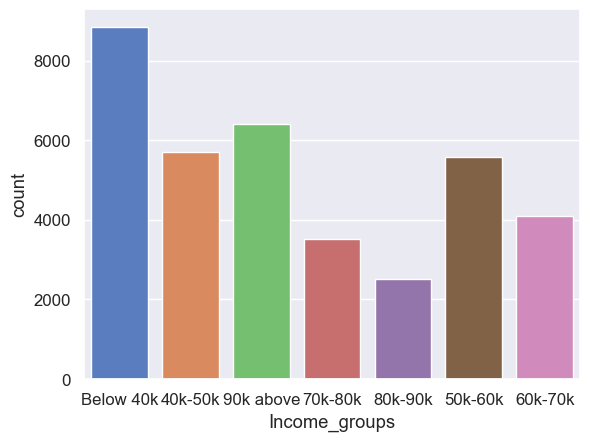

Countplot of term


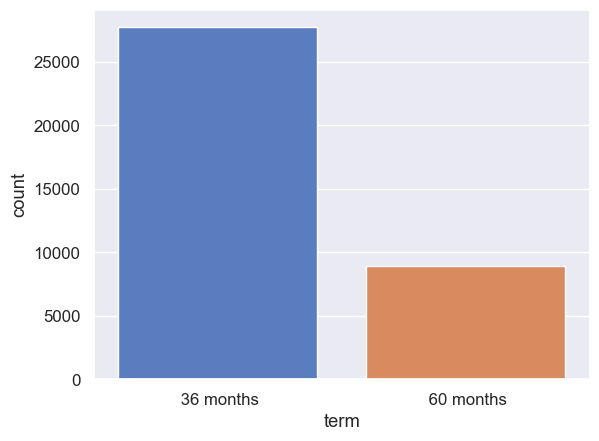

Countplot of inq_last_6mths


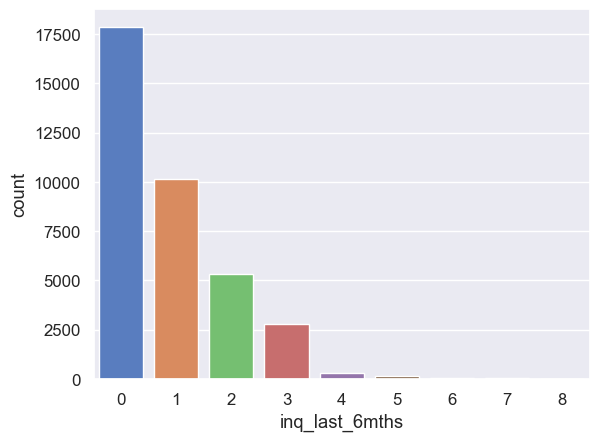

In [280]:
cat_cols = ["home_ownership","verification_status","grade","int_rate_groups","dti_groups","Income_groups","term","inq_last_6mths"]
for i in cat_cols:
       print("Countplot of",i)
       sns.countplot(x = loan_data[i], data=loan_data[loan_data.loan_status == 'Charged Off'],palette="muted")
       plt.show()

## Observations from the Analysis for the probability of max Defaults
1) The max number of defaults are done by applicants living on "Rent"
2) The max number of defaults are done by applicants  with verification status "Not Verified"
3) By applicants with grade "B"
4) By applicants who received the loan at an interest rate of "9-13%"
5) By applicants with dti_groups "12-18".
6) The max number of defaults are done by applicants  with the term of 36 months
   

<Axes: xlabel='inq_last_6mths', ylabel='count'>

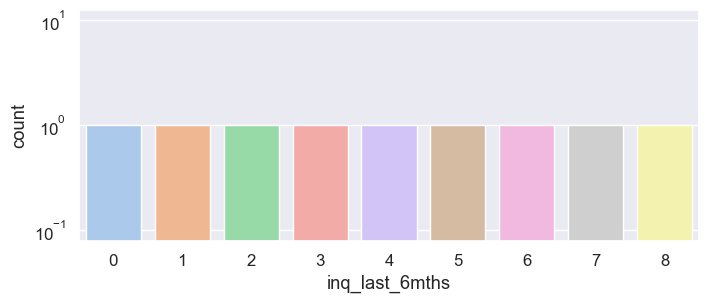

In [281]:
fig,ax = plt.subplots(figsize = (8,3))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'],palette="pastel")

<Axes: xlabel='count', ylabel='purpose'>

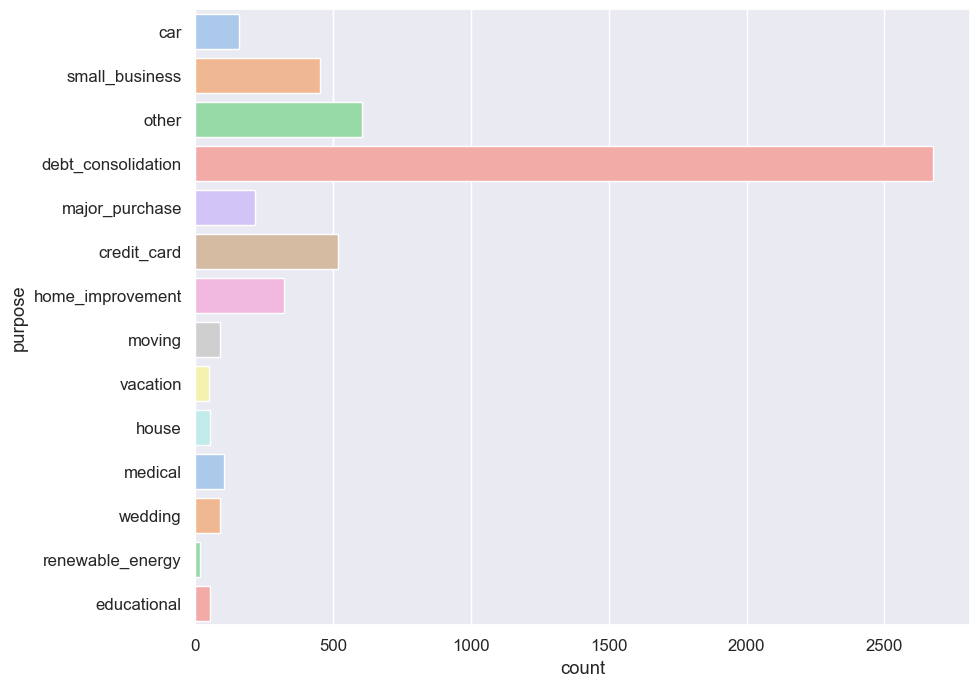

In [282]:
fig, ax = plt.subplots(figsize = (10,8))

sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'],palette="pastel")

<Axes: xlabel='emp_length', ylabel='count'>

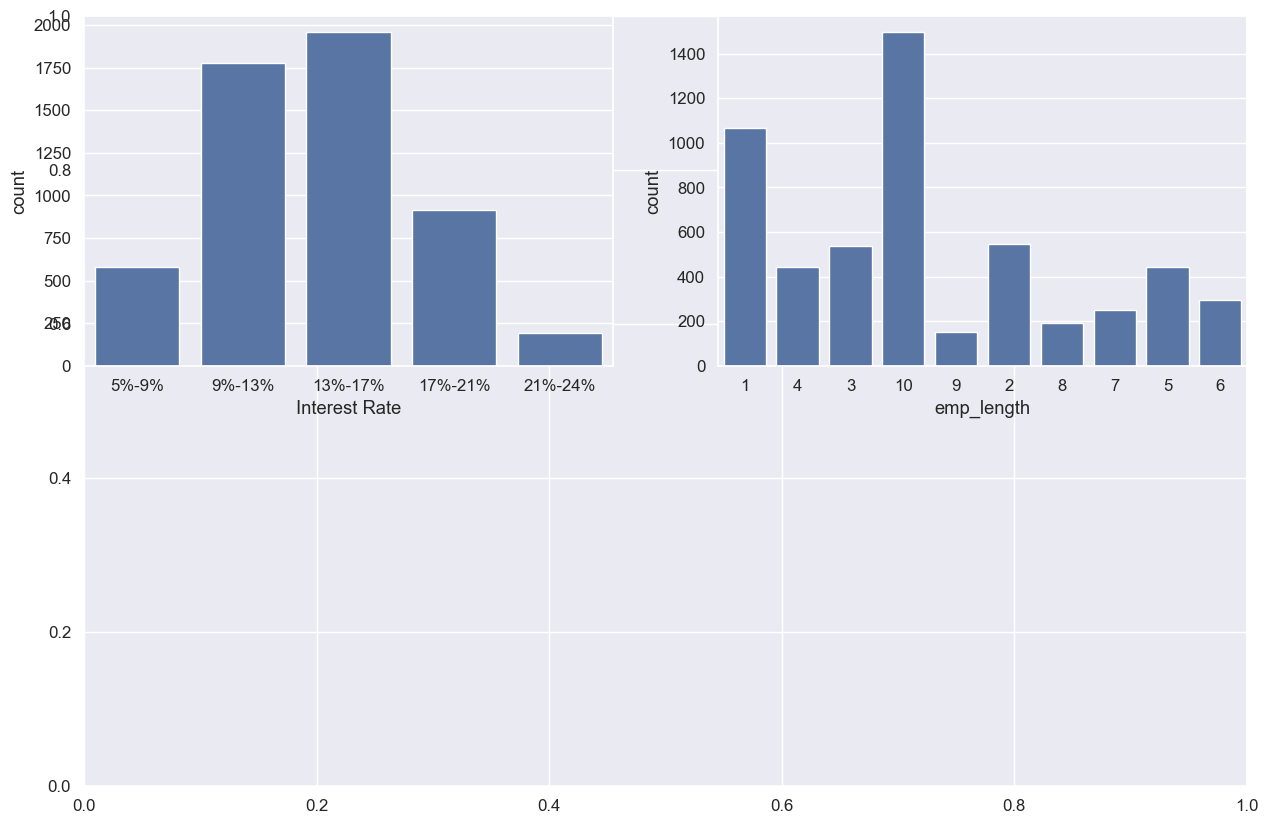

In [283]:

fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])

## Quantitative variables
1. Loan amount bucket (loan_amnt_groups)
2. Annual income bucket (Income_groups)
3. Debt to Income Ratio (DTI) bucket (dti_groups)
4. Monthly Installment (installment_groups)
5. Interest rate bucket (int_rate_bucket)
7. Funded amount bucket (funded_amnt_bucket)

## Bivariate analysis of Quantitative Variables

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

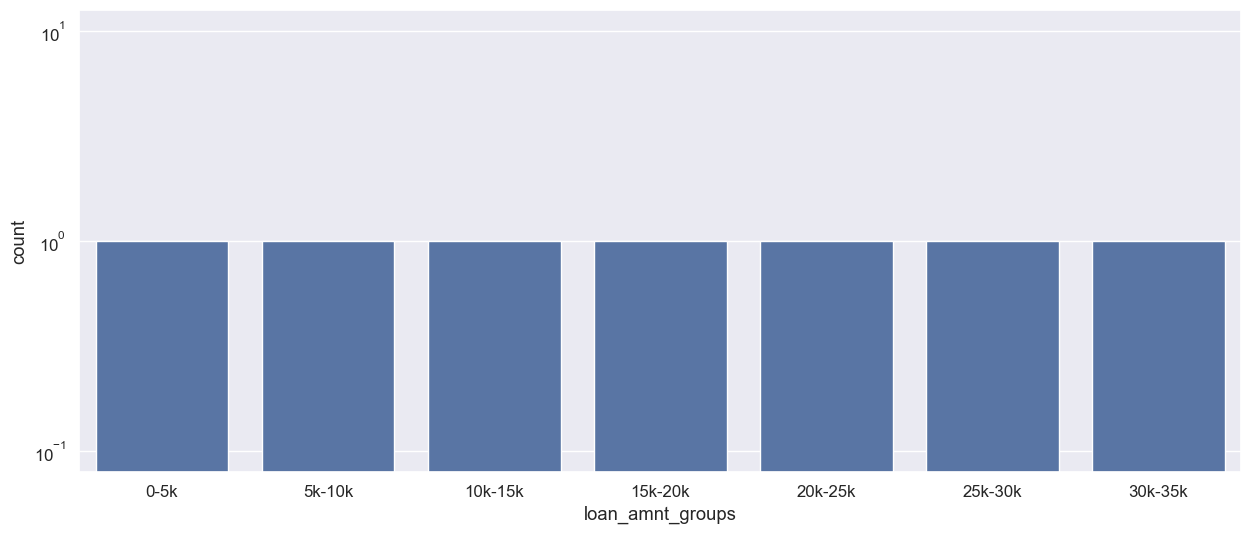

In [284]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='Income_groups', ylabel='count'>

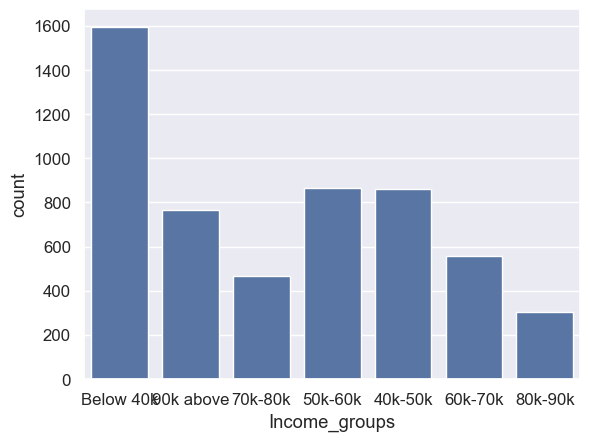

In [285]:

sns.countplot(x='Income_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

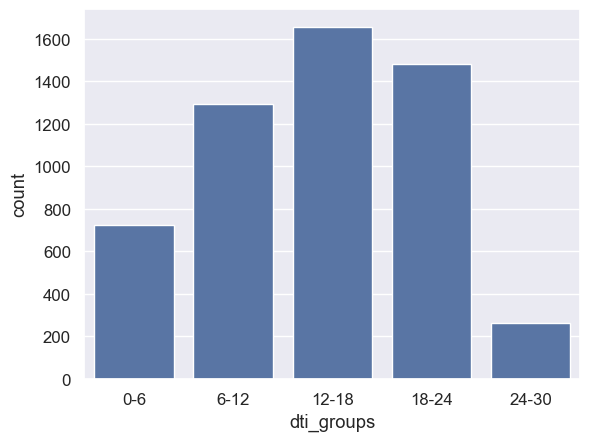

In [286]:

sns.countplot(x='dti_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='installment_groups', ylabel='count'>

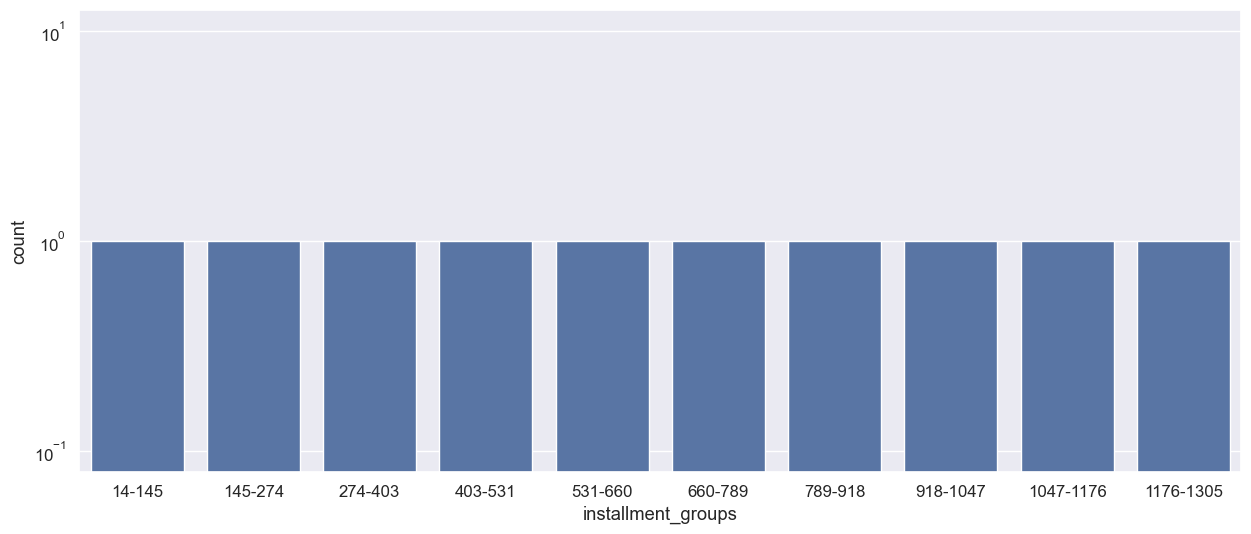

In [287]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

## Observations from the Analysis for the probability of max Defaults
1) The max number of defaults are done by applicants when the Loan amount is between 5429 - 10357
2) The max number of defaults are done by applicants  with income "Below 40k"
3) The max number of defaults are done by applicants when the Dti is between 12-18
4) The max number of defaults are done by applicants When the monthly installments are between 145-274


## Correlation Analysis

In [288]:
loan_data2.head()
loan_data2.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'out_prncp_inv',
       'total_pymnt_inv', 'pub_rec_bankruptcies'],
      dtype='object')

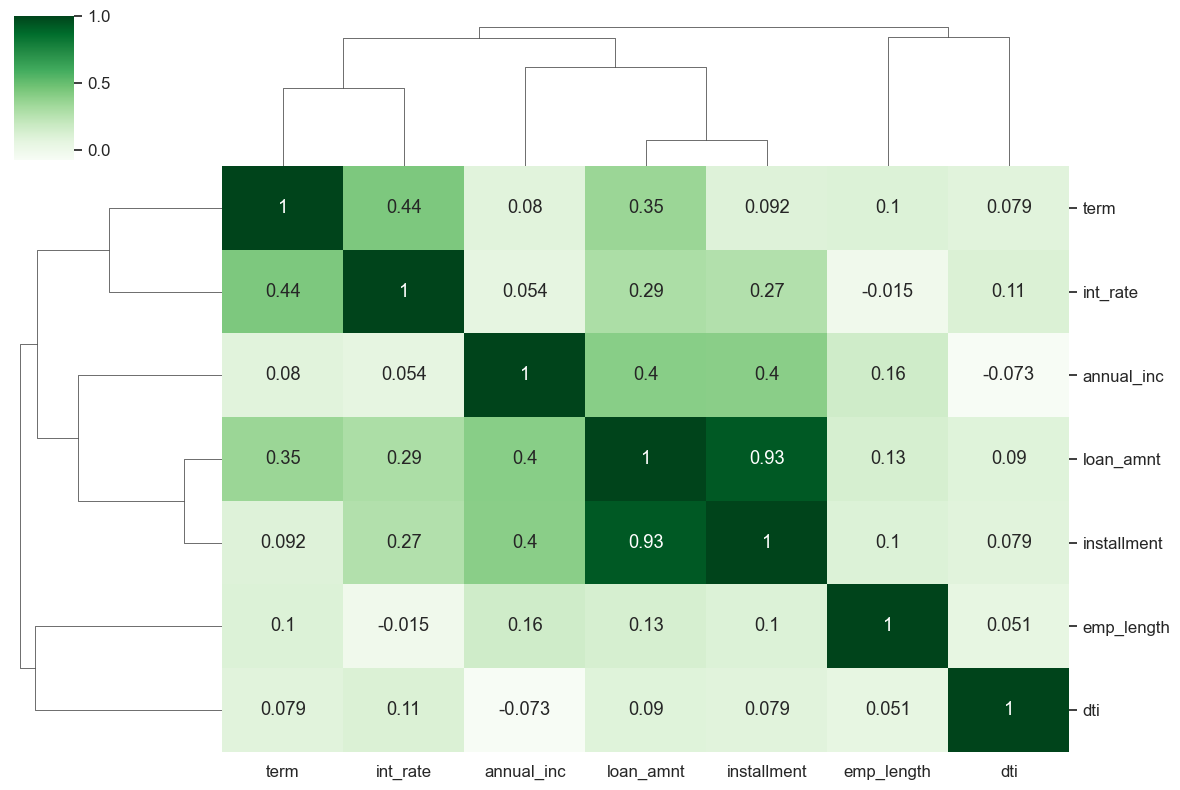

In [297]:
corr_df = loan_data2.copy()
# Filtering all the numerical values to understand their correlation
corr_df= loan_data2.filter(["loan_amnt",'emp_length','term','installment','annual_inc','dti','int_rate']) 
corr = corr_df.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Greens")
plt.show()


In [ ]:
# Create a Heatmap of the above 
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

## Inferences from Correlation Metrics

_*Strong Correlation*_

1) installment has a strong correlation with loan_amnt
2) annual_inc has a strong correlation with loan_amnt
3) term has a strong correlation with interest rate

*Weak Correlation*

1) dti has weak correlation with most of the fields
2) emp_length has weak correlation with most of the fields

*Negative Correlation*

1) annual_inc has a negative correlation with dti
